
# Бинарная классификация сетевого трафика: безопасный и вирусный.

**Напылов Евгений М22-ИВТ-1**

Требуется определить является ли сетевое взаимодействие опасным/безопасным по большому числу признаков трафика. Датасет содержит 84 признака, такие как IP, порт, размер пакета, число пакетов, скорость соединения и т.д. Классами являются метки Trojan - вирус и Benign - не вирус. Датасет содержит более 170 000 записей сетевых взаимодействий.

In [33]:
import numpy as np
import matplotlib.pyplot as plt            
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.notebook import trange, tqdm

## Data

In [2]:
url = '../data/network_traffic.csv'
data = pd.read_csv(url, sep=',', header=0, engine='python')
data.shape

(177482, 85)

In [3]:
data.head()

,FlowID,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Class
73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/201701:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/201710:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/201707:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/201703:48:44,286483,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/201710:47:35,65633087,12,10,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [4]:
data.tail()

,FlowID,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Class
40740,10.42.0.42-64.71.142.96-60811-80-6,10.42.0.42,60811,64.71.142.96,80,6,13/07/201703:50:57,40648037,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
82587,10.42.0.42-54.192.36.60-33004-80-6,10.42.0.42,33004,54.192.36.60,80,6,17/07/201703:36:20,2037177,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
66647,172.217.9.232-10.42.0.42-443-51049-6,10.42.0.42,51049,172.217.9.232,443,6,14/07/201703:45:27,397316,9,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
7987,10.42.0.211-10.42.0.1-9145-53-17,10.42.0.211,9145,10.42.0.1,53,17,11/07/201710:16:27,32073,1,1,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
167491,10.42.0.42-104.254.66.16-47389-80-6,10.42.0.42,47389,104.254.66.16,80,6,05/07/201709:18:02,360889,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
np.random.seed(123)
random_set = np.random.choice(np.arange(data.shape[0]), size=500)

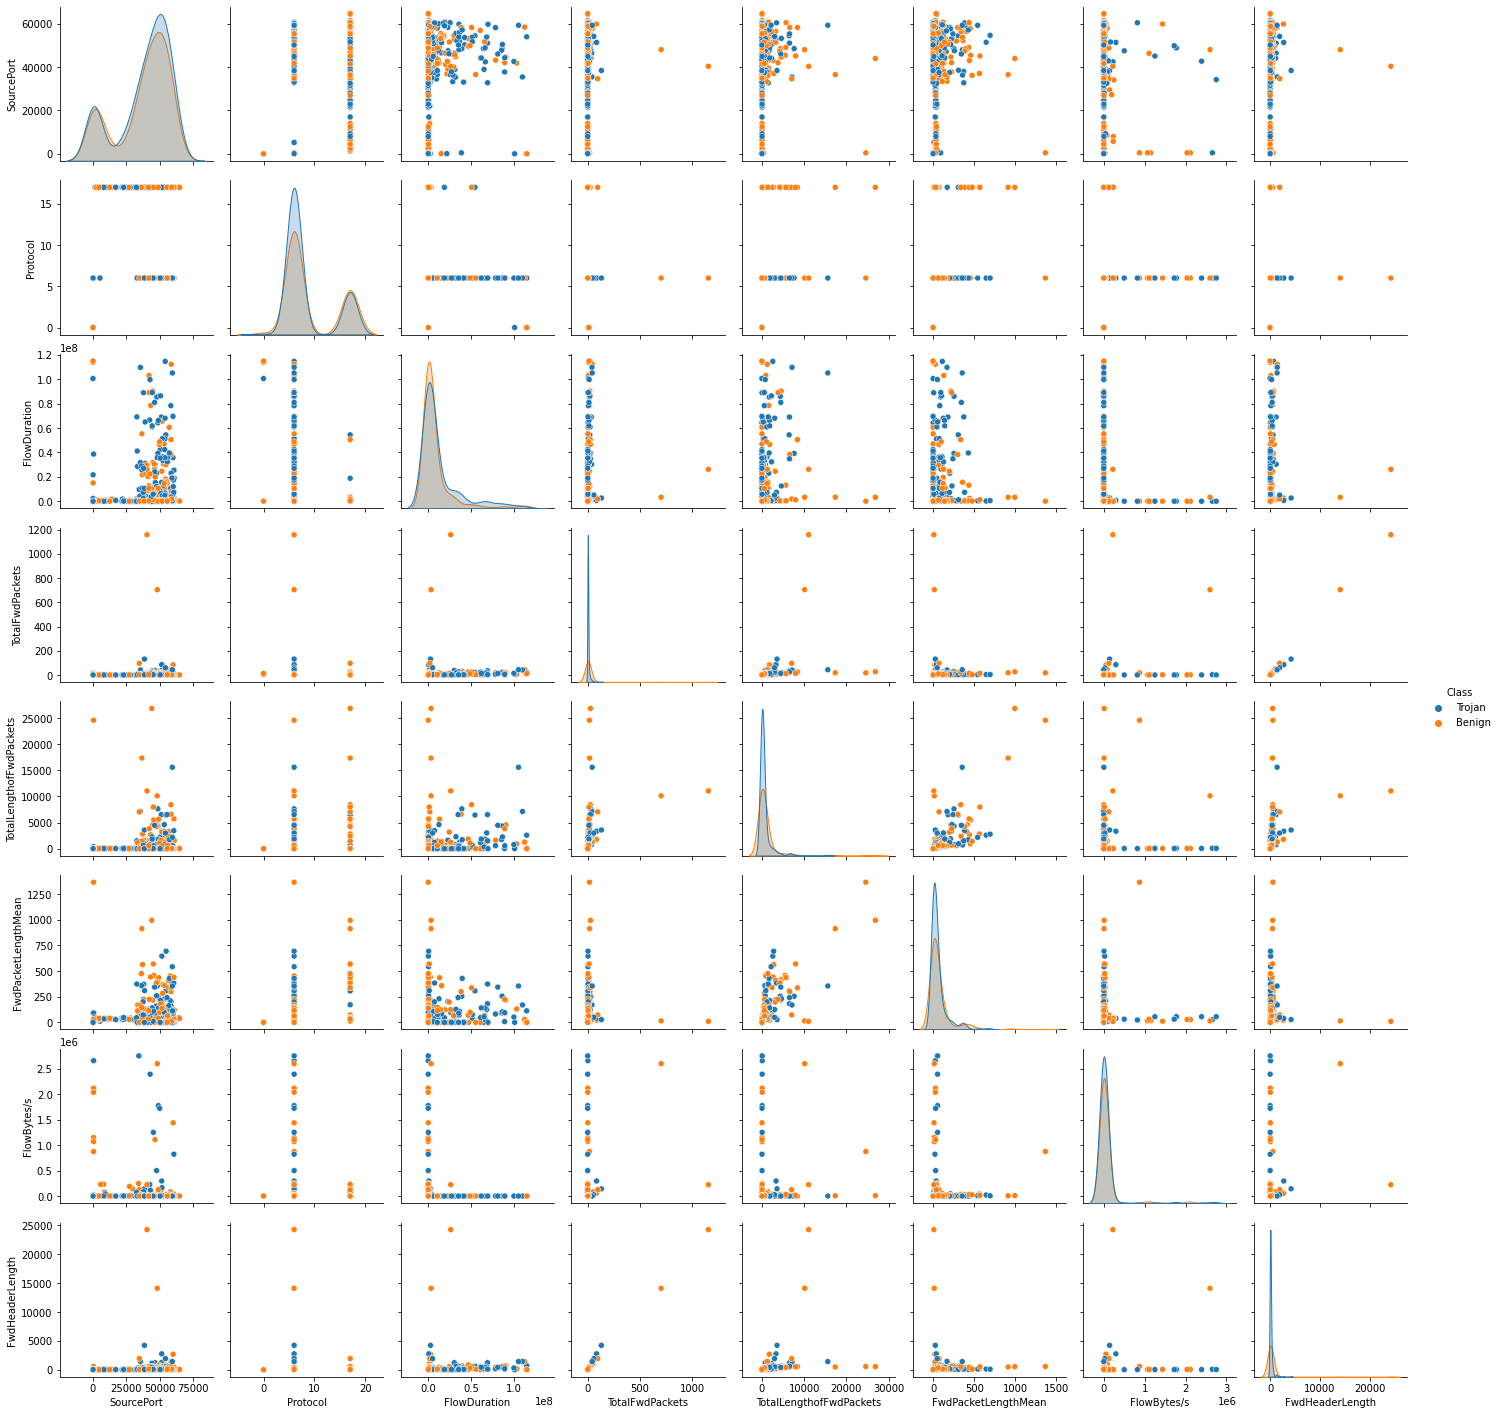

In [6]:
from pandas.plotting import scatter_matrix
headers = ['SourceIP', 'SourcePort', 'Protocol', 'FlowDuration', 'TotalFwdPackets', 'TotalLengthofFwdPackets', 'FwdPacketLengthMean', 'FlowBytes/s', 'FwdHeaderLength', 'Class']
sns.pairplot(data.iloc[random_set][headers], diag_kind = 'auto', hue='Class')
pass

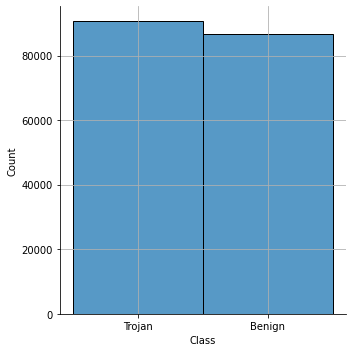

In [7]:
sns.displot(data['Class'], bins=2)
plt.grid()
pass

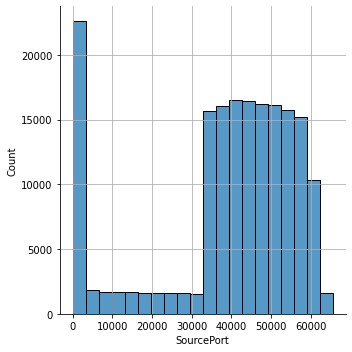

In [8]:
sns.displot(data['SourcePort'], bins=20)
plt.grid()
pass

In [9]:
data.isna().sum().sum()

0

## Preprocessing

### Encoding of text data

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
categorical_columns

['FlowID', 'SourceIP', 'DestinationIP', 'Timestamp', 'Class']

In [11]:
data_describe = data.describe(include = [object])
number = preprocessing.LabelEncoder()
data["FlowID"] = number.fit_transform(data["FlowID"])
data["SourceIP"] = number.fit_transform(data["SourceIP"])
data["DestinationIP"] = number.fit_transform(data["DestinationIP"])
data["Timestamp"] = number.fit_transform(data["Timestamp"])

numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
len(numerical_columns)

84

In [12]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]

In [13]:
data['Class'].unique()

array(['Trojan', 'Benign'], dtype=object)

In [14]:
data.at[data['Class'] == 'Trojan', 'Class'] = 1
data.at[data['Class'] == 'Benign', 'Class'] = 0

### Normalization of numeric data

In [15]:
data_numerical = data[numerical_columns].astype('float32')
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical = data_numerical.fillna(0.0)

### Concatination

In [16]:
data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
data.shape

(177482, 85)

In [17]:
data.head()

,FlowID,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Class
73217,-0.254680,-0.301850,0.615199,-0.551040,-0.374989,-0.505653,1.285073,-0.038628,-0.092527,-0.055528,...,-1.172876,-0.182251,-0.082902,-0.183967,-0.168432,-0.294287,-0.123948,-0.300703,-0.281379,1
72089,0.846469,-0.301850,0.571479,0.048341,-0.351038,1.916987,1.531425,-0.494133,-0.025086,-0.027333,...,-1.172876,-0.182251,-0.082902,-0.183967,-0.168432,-0.294287,-0.123948,-0.300703,-0.281379,1
96676,-1.665593,-0.301850,-0.047966,-0.931863,-0.376771,1.916987,1.765842,-0.460738,-0.193688,-0.083723,...,0.631080,-0.182251,-0.082902,-0.183967,-0.168432,-0.294287,-0.123948,-0.300703,-0.281379,0
42891,-1.619663,-0.301850,0.147468,-0.931863,-0.376771,1.916987,0.755896,-0.492732,-0.193688,-0.083723,...,-1.172876,-0.182251,-0.082902,-0.183967,-0.168432,-0.294287,-0.123948,-0.300703,-0.281379,1
169326,-1.224047,-0.307994,0.310249,-0.696746,-0.351038,-0.505653,-0.346225,2.344973,0.177238,0.000862,...,0.631080,0.231390,-0.082902,0.182972,0.261303,3.614245,-0.123948,3.404611,3.725784,0


## Train & test split

In [18]:
X = data.drop('Class', axis = 1).to_numpy()
y = np.array(data['Class'], dtype='int')

In [19]:
X.shape, y.shape

((177482, 84), (177482,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
y_train.shape, y_test.shape

((124237,), (53245,))

## SVM

In [22]:
%%time
model = svm.SVC(verbose=True)

Wall time: 0 ns


In [23]:
%%time
model.fit(X_train, y_train)

[LibSVM]Wall time: 10min 42s


SVC(verbose=True)

In [29]:
train_predict = model.predict(X_train)
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     60725
           1       0.93      0.98      0.95     63512

    accuracy                           0.95    124237
   macro avg       0.95      0.95      0.95    124237
weighted avg       0.95      0.95      0.95    124237



## Test

In [25]:
test_predict = model.predict(X_test)

In [26]:
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     26074
           1       0.93      0.97      0.95     27171

    accuracy                           0.95     53245
   macro avg       0.95      0.95      0.95     53245
weighted avg       0.95      0.95      0.95     53245



In [27]:
conf_mat = confusion_matrix(y_test, test_predict)
conf_mat

array([[24076,  1998],
       [  776, 26395]], dtype=int64)

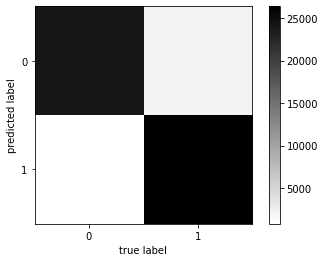

In [28]:
plt.imshow(conf_mat, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

0.95 норм результат, но обучалось 10 минут. Скорее всего это проблема sklearn-a.